In [14]:
import numpy as np
import pandas as pd

### Importing the database

In [15]:
dfs=[]
for i in range(1991,2025):
    filepath=rf'D:\Projects\Tennis output prediction model\Tennis DataSet\atp_matches_{str(i)}.csv'
    dfs.append(pd.read_csv(filepath))
df=pd.concat(dfs, axis=0,ignore_index=True)
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,NaN,Q,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,NaN,NaN,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,8.0,NaN,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,NaN,NaN,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108370,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,5,212051,NaN,NaN,...,30.0,17.0,7.0,6.0,8.0,14.0,1109.0,8.0,740.0,34.0
108371,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,1,122533,NaN,NaN,...,41.0,25.0,6.0,9.0,1.0,4.0,554.0,67.0,748.0,32.0
108372,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,2,144748,NaN,NaN,...,51.0,25.0,7.0,11.0,5.0,12.0,416.0,109.0,NaN,NaN
108373,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,4,122533,NaN,NaN,...,51.0,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0


# Data Cleaning

### Dropping Irrelevant Columns

In [16]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [17]:
columns_to_drop = [
    'winner_seed', 'winner_entry', 'loser_seed', 'loser_entry','minutes'
]

df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')


### Removing the Null Values

In [18]:
df.isnull().sum()

tourney_id                0
tourney_name              0
surface                  53
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_name               0
winner_hand               0
winner_ht              2248
winner_ioc                0
winner_age                5
loser_id                  0
loser_name                0
loser_hand                4
loser_ht               4490
loser_ioc                 0
loser_age                15
score                     0
best_of                   0
round                     0
w_ace                 10325
w_df                  10325
w_svpt                10325
w_1stIn               10325
w_1stWon              10325
w_2ndWon              10325
w_SvGms               10325
w_bpSaved             10325
w_bpFaced             10325
l_ace                 10325
l_df                  10325
l_svpt                10325
l_1stIn               10325
l_1stWon            

In [19]:
df=df.dropna(subset=['surface','winner_ht','loser_ht','winner_age','loser_age', 
       'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 
       'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'])
df.isnull().sum()

tourney_id            0
tourney_name          0
surface               0
draw_size             0
tourney_level         0
tourney_date          0
match_num             0
winner_id             0
winner_name           0
winner_hand           0
winner_ht             0
winner_ioc            0
winner_age            0
loser_id              0
loser_name            0
loser_hand            0
loser_ht              0
loser_ioc             0
loser_age             0
score                 0
best_of               0
round                 0
w_ace                 0
w_df                  0
w_svpt                0
w_1stIn               0
w_1stWon              0
w_2ndWon              0
w_SvGms               0
w_bpSaved             0
w_bpFaced             0
l_ace                 0
l_df                  0
l_svpt                0
l_1stIn               0
l_1stWon              0
l_2ndWon              0
l_SvGms               0
l_bpSaved             0
l_bpFaced             0
winner_rank           0
winner_rank_poin

### Sorting the rows with respect to tourney date

In [20]:
df['tourney_date']=pd.to_datetime(df['tourney_date'],format='%Y%m%d')
df=df.sort_values(by='tourney_date').reset_index(drop=True)
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-301,Auckland,Hard,32,A,1991-01-07,1,101142,Emilio Sanchez,R,...,30.0,17.0,7.0,8.0,2.0,6.0,9.0,1487.0,78.0,459.0
1,1991-338,Sydney Outdoor,Hard,32,A,1991-01-07,4,101772,Andrei Cherkasov,R,...,38.0,22.0,10.0,7.0,16.0,21.0,21.0,1003.0,26.0,893.0
2,1991-338,Sydney Outdoor,Hard,32,A,1991-01-07,5,101098,Guy Forget,L,...,28.0,15.0,16.0,9.0,2.0,5.0,16.0,1101.0,47.0,638.0
3,1991-338,Sydney Outdoor,Hard,32,A,1991-01-07,6,101889,Todd Woodbridge,R,...,57.0,29.0,8.0,10.0,5.0,10.0,52.0,583.0,46.0,643.0
4,1991-338,Sydney Outdoor,Hard,32,A,1991-01-07,7,102148,Fabrice Santoro,R,...,30.0,16.0,10.0,10.0,2.0,8.0,54.0,557.0,48.0,611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95370,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,397,209950,Arthur Fils,R,...,33.0,24.0,8.0,9.0,4.0,7.0,20.0,2355.0,48.0,1136.0
95371,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,398,210530,Learner Tien,L,...,55.0,38.0,7.0,13.0,5.0,9.0,122.0,493.0,41.0,1245.0
95372,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,399,211663,Joao Fonseca,R,...,35.0,19.0,7.0,9.0,10.0,14.0,145.0,409.0,128.0,471.0
95373,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,390,210506,Alex Michelsen,R,...,48.0,31.0,15.0,11.0,1.0,3.0,41.0,1245.0,128.0,471.0


# Feature Extraction

Converting Winner, Loser based columns into Player_A, Player_B based representation, which helps in predicting the outcome.

In [21]:
import random 
df1=pd.DataFrame()
df1[['Player_A','Player_A_name','Player_A_hand','Player_A_ht','Player_A_age','Player_A_rank', 'Player_A_rank_points',
    'Player_B','Player_B_name','Player_B_hand','Player_B_ht','Player_B_age','Player_B_rank', 'Player_B_rank_points',
    'Best_of','Round','Surface', 'Draw_Size','tourney_date',
    'Player_A_ace', 'Player_A_df', 'Player_A_svpt', 'Player_A_1stIn', 'Player_A_1stWon', 'Player_A_2ndWon', 'Player_A_SvGms','Player_A_bpSaved', 'Player_A_bpFaced', 
    'Player_B_ace', 'Player_B_df', 'Player_B_svpt', 'Player_B_1stIn','Player_B_1stWon', 'Player_B_2ndWon', 'Player_B_SvGms', 'Player_B_bpSaved', 'Player_B_bpFaced','Winner']]=0


def create_match(row):
    if random.random()<0.5:
        return pd.Series([row['winner_id'],row['winner_name'],row['winner_hand'],row['winner_ht'],row['winner_age'],row['winner_rank'],row['winner_rank_points'],
                          row['loser_id'],row['loser_name'],row['loser_hand'],row['loser_ht'],row['loser_age'],row['loser_rank'],row['loser_rank_points'],
                          row['best_of'],row['round'],row['surface'],row['draw_size'],row['tourney_date'],
                          row['w_ace'], row['w_df'], row['w_svpt'], row['w_1stIn'], row['w_1stWon'], row['w_2ndWon'], row['w_SvGms'],row['w_bpSaved'], row['w_bpFaced'], 
                          row['l_ace'], row['l_df'], row['l_svpt'], row['l_1stIn'],row['l_1stWon'], row['l_2ndWon'], row['l_SvGms'], row['l_bpSaved'], row['l_bpFaced'],1])
    else:
        return pd.Series([row['loser_id'],row['loser_name'],row['loser_hand'],row['loser_ht'],row['loser_age'],row['loser_rank'],row['loser_rank_points'],
                          row['winner_id'],row['winner_name'],row['winner_hand'],row['winner_ht'],row['winner_age'],row['winner_rank'],row['winner_rank_points'],
                          row['best_of'],row['round'],row['surface'],row['draw_size'],row['tourney_date'],
                          row['l_ace'], row['l_df'], row['l_svpt'], row['l_1stIn'],row['l_1stWon'], row['l_2ndWon'], row['l_SvGms'], row['l_bpSaved'], row['l_bpFaced'],
                          row['w_ace'], row['w_df'], row['w_svpt'], row['w_1stIn'], row['w_1stWon'], row['w_2ndWon'], row['w_SvGms'],row['w_bpSaved'], row['w_bpFaced'],0])
    
df1[['Player_A','Player_A_name','Player_A_hand','Player_A_ht','Player_A_age','Player_A_rank', 'Player_A_rank_points',
    'Player_B','Player_B_name','Player_B_hand','Player_B_ht','Player_B_age','Player_B_rank', 'Player_B_rank_points',
    'Best_of','Round','Surface', 'Draw_Size','tourney_date',
    'Player_A_ace', 'Player_A_df', 'Player_A_svpt', 'Player_A_1stIn', 'Player_A_1stWon', 'Player_A_2ndWon', 'Player_A_SvGms','Player_A_bpSaved', 'Player_A_bpFaced', 
    'Player_B_ace', 'Player_B_df', 'Player_B_svpt', 'Player_B_1stIn','Player_B_1stWon', 'Player_B_2ndWon', 'Player_B_SvGms', 'Player_B_bpSaved', 'Player_B_bpFaced','Winner']]=df.apply(create_match,axis=1)

In [22]:
data=df1
data.columns

Index(['Player_A', 'Player_A_name', 'Player_A_hand', 'Player_A_ht',
       'Player_A_age', 'Player_A_rank', 'Player_A_rank_points', 'Player_B',
       'Player_B_name', 'Player_B_hand', 'Player_B_ht', 'Player_B_age',
       'Player_B_rank', 'Player_B_rank_points', 'Best_of', 'Round', 'Surface',
       'Draw_Size', 'tourney_date', 'Player_A_ace', 'Player_A_df',
       'Player_A_svpt', 'Player_A_1stIn', 'Player_A_1stWon', 'Player_A_2ndWon',
       'Player_A_SvGms', 'Player_A_bpSaved', 'Player_A_bpFaced',
       'Player_B_ace', 'Player_B_df', 'Player_B_svpt', 'Player_B_1stIn',
       'Player_B_1stWon', 'Player_B_2ndWon', 'Player_B_SvGms',
       'Player_B_bpSaved', 'Player_B_bpFaced', 'Winner'],
      dtype='object')

In [23]:
columns_to_drop=['Player_A_name','Player_B_name','Surface','tourney_date', 'Player_A_ace', 'Player_A_df',
       'Player_A_svpt', 'Player_A_1stIn', 'Player_A_1stWon', 'Player_A_2ndWon',
       'Player_A_SvGms', 'Player_A_bpSaved', 'Player_A_bpFaced',
       'Player_B_ace', 'Player_B_df', 'Player_B_svpt', 'Player_B_1stIn',
       'Player_B_1stWon', 'Player_B_2ndWon', 'Player_B_SvGms',
       'Player_B_bpSaved', 'Player_B_bpFaced','Player_A_ht', 'Player_A_age','Player_A_rank', 'Player_A_rank_points',
       'Player_B_ht', 'Player_B_age','Player_B_rank', 'Player_B_rank_points'
]
data=data.drop(columns=columns_to_drop, errors='ignore')
data.columns

Index(['Player_A', 'Player_A_hand', 'Player_B', 'Player_B_hand', 'Best_of',
       'Round', 'Draw_Size', 'Winner'],
      dtype='object')

In [24]:
data.rename(columns={'Player_A':'PLAYER_A','Player_A_hand':'PLAYER_A_HAND','Player_B_hand':'PLAYER_B_HAND','Best_of':'BEST_OF','Round':'ROUND',
                     'Draw_Size':'DRAW_SIZE','Winner':'WINNER','ELO_diff':'ELO_DIFF','ELO_Surface_diff':'ELO_SURFACE_DIFF'}, inplace=True)
data['HEIGHT_DIFF']=df1['Player_A_ht']-df1['Player_B_ht']
data['AGE_DIFF']=df1['Player_A_age']-df1['Player_B_age']
data['ATP_RANK_DIFF']=df1['Player_A_rank']-df1['Player_B_rank']
data['ATP_POINTS_DIFF']=df1['Player_A_rank_points']-df1['Player_B_rank_points']

Calculating Head to Head record of both players

In [25]:
from collections import defaultdict
h2h=defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
h2h_diff_list=[]
h2h_surface_diff_list=[]

for idx,row in df1.iterrows():
    A=row['Player_A']
    B=row['Player_B']
    Winner=row['Winner']
    Surface=row['Surface']

    h2h_diff_list.append(h2h[A][B]['Overall']-h2h[B][A]['Overall'])
    h2h_surface_diff_list.append(h2h[A][B][Surface]-h2h[B][A][Surface])
    if Winner==1:
        h2h[A][B]['Overall']+=1
        h2h[A][B][Surface]+=1
    else:
        h2h[B][A]['Overall']+=1
        h2h[B][A][Surface]+=1
data['H2H_DIFF']=h2h_diff_list
data['H2H_SURFACE_DIFF']=h2h_surface_diff_list

In [26]:
from collections import deque
Number_Of_Matches=[3,5,10,25,100]
for number in Number_Of_Matches:
    last_results=defaultdict(lambda: deque(maxlen=number))
    number_of_wins=[]
    for idx,row in df1.iterrows():
        A=row['Player_A']
        B=row['Player_B']
        Winner=row['Winner']
        number_of_wins.append(sum(last_results[A])-sum(last_results[B]))
        if Winner==1:
            last_results[A].append(1)
            last_results[B].append(0)
        else:
            last_results[A].append(0)
            last_results[B].append(1)
    data[f'WIN_LAST_{number}_DIFF']=number_of_wins


In [27]:
columns=['ace','df','svpt','1stIn','1stWon','2ndWon','SvGms','bpSaved','bpFaced']
Number_Of_Matches=[3,5,10,20,50,100]
for number in Number_Of_Matches:
    for column in columns:
        last_results=defaultdict(lambda: deque(maxlen=number))
        count_diff=[]
        for idx,row in df1.iterrows():
            A=row['Player_A']
            B=row['Player_B']
            A_score=row[f'Player_A_{column}']
            B_score=row[f'Player_B_{column}']
            count_diff.append(sum(last_results[A])-sum(last_results[B]))
            last_results[A].append(A_score)
            last_results[B].append(B_score)
        data[f'P_{column.upper()}_LAST_{number}_DIFF']=count_diff

In [ ]:
Accuracy = {}

# Initialize elo_map outside the loop over k
initial_elo = 1500

for k in range(10, 41):
    match_no = 0
    cnt = 0
    name_map = {}
    elo_map = {}

    # Assuming df1 is sorted by date already
    for idx, row in df1.iterrows():
        A_id = row['Player_A']
        B_id = row['Player_B']
        ra = elo_map.get(A_id, initial_elo)
        rb = elo_map.get(B_id, initial_elo)

        # Count correct predictions
        if (ra - rb >= 0 and row['Winner'] == 1) or (ra - rb <= 0 and row['Winner'] == 0):
            cnt += 1

        # Update Elo ratings based on match result
        if row['Winner'] == 1:
            ea = 1 / (1 + 10 ** ((rb - ra) / 400))
            ra_new = ra + k * (1 - ea)
            rb_new = rb - k * (1 - ea)
        else:
            ea = 1 / (1 + 10 ** ((ra - rb) / 400))
            ra_new = ra - k * (1 - ea)
            rb_new = rb + k * (1 - ea)

        # Store updated Elo ratings in the elo_map
        elo_map[A_id] = ra_new
        elo_map[B_id] = rb_new

        # Optionally store player names if needed
        name_map[A_id] = row['Player_A_name']
        name_map[B_id] = row['Player_B_name']

    # Calculate accuracy for the current value of k
    accuracy = (cnt / len(df1)) * 100
    Accuracy[k] = accuracy

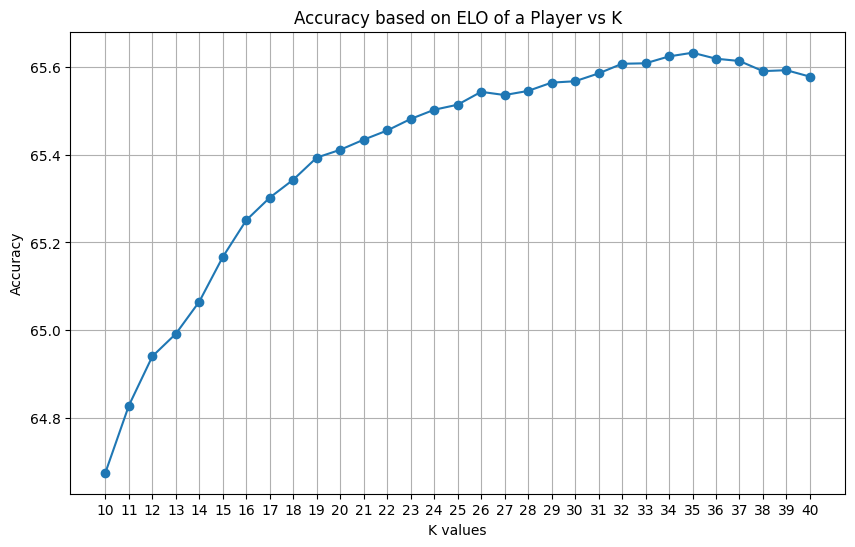

In [ ]:
import matplotlib.pyplot as plt
ks=list(Accuracy.keys())
accuracy=list(Accuracy.values())

plt.figure(figsize=(10,6))
plt.plot(ks,accuracy,marker='o',linestyle='-')
plt.title('Accuracy based on ELO of a Player vs K')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(ks)
plt.show()

### Calculating Elo of a player based on the surface they play

In Tennis, the surface a player plays on has a major role in his performance. So it's important to calculate player ELO based on different surfaces.

In [28]:
df1['Surface']=df1['Surface'].str.strip()
df1['Surface'].value_counts().sort_index()

Surface
Carpet     5595
Clay      31349
Grass      9945
Hard      48486
Name: count, dtype: int64

In [30]:
inital_elo,k=1500,35
df1[['ELO_diff','ELO_Surface_diff']]=0.0

elo_maps=defaultdict(dict)
grad_diff=[]
for idx,row in df1.iterrows():
    A_id=row['Player_A']
    B_id=row['Player_B']
    surface=row['Surface']
    #Retrieving Player's Overall ELO before this match.
    ra=elo_maps[A_id].get('Overall',inital_elo)
    rb=elo_maps[B_id].get('Overall',inital_elo)
    #Retrieving Player's Surface Specific ELO before this match.
    rae=elo_maps[A_id].get(surface,ra)
    rbe=elo_maps[B_id].get(surface,rb)
    #Inserting ELO diff into dataframe
    df1.loc[idx,'ELO_diff']=ra-rb
    #Inserting surface elo diff into the dataframe
    df1.loc[idx,'ELO_Surface_diff']=rae-rbe
    #Updating the elo of both the players after the match
    if row['Winner'] == 1:
        eae = 1 / (1 + 10 ** ((rbe - rae) / 400))
        rae_new = rae + k * (1 - eae)
        rbe_new = rbe - k * (1 - eae)
        ea = 1 / (1 + 10 ** ((rb - ra) / 400))
        ra_new = ra + k * (1 - ea)
        rb_new = rb - k * (1 - ea)
    else:
        eae = 1 / (1 + 10 ** ((rae - rbe) / 400))
        rae_new = rae - k * (1 - eae)
        rbe_new = rbe + k * (1 - eae)
        ea = 1 / (1 + 10 ** ((ra - rb) / 400))
        ra_new = ra - k * (1 - ea)
        rb_new = rb + k * (1 - ea)
    elo_maps[A_id]['Overall']=ra_new
    elo_maps[A_id][surface]=rae_new
    elo_maps[B_id]['Overall']=rb_new
    elo_maps[B_id][surface]=rbe_new
        

In [31]:
data['ELO_DIFF'],data['ELO_SURFACE_DIFF']=df1['ELO_diff'],df1['ELO_Surface_diff']

In [34]:
data.columns

Index(['PLAYER_A', 'PLAYER_A_HAND', 'Player_B', 'PLAYER_B_HAND', 'BEST_OF',
       'ROUND', 'DRAW_SIZE', 'WINNER', 'HEIGHT_DIFF', 'AGE_DIFF',
       'ATP_RANK_DIFF', 'ATP_POINTS_DIFF', 'H2H_DIFF', 'H2H_SURFACE_DIFF',
       'WIN_LAST_3_DIFF', 'WIN_LAST_5_DIFF', 'WIN_LAST_10_DIFF',
       'WIN_LAST_25_DIFF', 'WIN_LAST_100_DIFF', 'P_ACE_LAST_3_DIFF',
       'P_DF_LAST_3_DIFF', 'P_SVPT_LAST_3_DIFF', 'P_1STIN_LAST_3_DIFF',
       'P_1STWON_LAST_3_DIFF', 'P_2NDWON_LAST_3_DIFF', 'P_SVGMS_LAST_3_DIFF',
       'P_BPSAVED_LAST_3_DIFF', 'P_BPFACED_LAST_3_DIFF', 'P_ACE_LAST_5_DIFF',
       'P_DF_LAST_5_DIFF', 'P_SVPT_LAST_5_DIFF', 'P_1STIN_LAST_5_DIFF',
       'P_1STWON_LAST_5_DIFF', 'P_2NDWON_LAST_5_DIFF', 'P_SVGMS_LAST_5_DIFF',
       'P_BPSAVED_LAST_5_DIFF', 'P_BPFACED_LAST_5_DIFF', 'P_ACE_LAST_10_DIFF',
       'P_DF_LAST_10_DIFF', 'P_SVPT_LAST_10_DIFF', 'P_1STIN_LAST_10_DIFF',
       'P_1STWON_LAST_10_DIFF', 'P_2NDWON_LAST_10_DIFF',
       'P_SVGMS_LAST_10_DIFF', 'P_BPSAVED_LAST_10_DIFF',
   

In [35]:
data.to_csv(rf'D:\Projects\Tennis output prediction model\Tennis DataSet\Final_Dataset.csv')

In [36]:
data=pd.read_csv(rf'D:\Projects\Tennis output prediction model\Tennis DataSet\Final_Dataset.csv')

In [37]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['PLAYER_A_HAND', 'PLAYER_B_HAND', 'ROUND'] 

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [38]:
from sklearn.model_selection import train_test_split

x=data.drop(['WINNER'], axis=1)
y=data['WINNER']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.6667889908256881

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      9535
           1       0.67      0.66      0.67      9540

    accuracy                           0.67     19075
   macro avg       0.67      0.67      0.67     19075
weighted avg       0.67      0.67      0.67     19075

Confusion Matrix:
 [[6405 3130]
 [3226 6314]]


In [41]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [52]:
import xgboost as xgb
model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    colsample_bytree=0.6,
    eval_metric='logloss'
)
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [53]:
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.6810484927916121
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.68      9535
           1       0.68      0.69      0.68      9540

    accuracy                           0.68     19075
   macro avg       0.68      0.68      0.68     19075
weighted avg       0.68      0.68      0.68     19075

Confusion Matrix:
 [[6436 3099]
 [2985 6555]]


In [51]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

xgb_clf = xgb.XGBClassifier(eval_metric='logloss')
search = RandomizedSearchCV(xgb_clf, params, scoring='accuracy', n_iter=20, cv=3, random_state=42, verbose=1)
search.fit(X_train, Y_train)

print("Best params:", search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
